Importing the necessary libraries 

In [7]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline


data = pd.read_csv(r"C:\Users\A V NITHYA\Desktop\asd_data_adult.csv")
display(data.head(n=5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


Data Exploration and Cleaning

In [8]:
# Total number of records
n_records = len(data.index)

# Number of records where individuals are diagonised with ASD
asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Number of records where individuals are not diagonised with ASD
asd_no = len(data[data['Class/ASD'] == 'NO'])

# Percentage of individuals with ASD
asd_yes_percent = float(asd_yes) / n_records *100


print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(asd_yes))
print("Individuals not diagonised with ASD: {}".format(asd_no))
print("Percentage of individuals diagonised with ASD: {:.2f}%".format(asd_yes_percent))

Total number of records: 704
Individuals diagonised with ASD: 189
Individuals not diagonised with ASD: 515
Percentage of individuals diagonised with ASD: 26.85%


In [9]:
asd_data = pd.read_csv(r"C:\Users\A V NITHYA\Desktop\asd_data_adult.csv", na_values=['?'])
asd_data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,NaN,no,no,Russia,no,7.0,18 and more,NaN,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [10]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [11]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
|(asd_data['jundice'].isnull())|(asd_data['austim'].isnull()) |(asd_data['contry_of_res'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO
12,0,1,1,1,1,1,0,0,1,0,...,f,NaN,no,no,Bahamas,no,6.0,18 and more,NaN,NO
13,1,0,0,0,0,0,1,1,0,1,...,m,NaN,no,no,Austria,no,4.0,18 and more,NaN,NO
14,1,0,0,0,0,0,1,1,0,1,...,f,NaN,no,no,Argentina,no,4.0,18 and more,NaN,NO
19,0,0,0,0,0,0,1,1,0,1,...,m,NaN,yes,no,United Arab Emirates,no,3.0,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0,0,0,0,0,0,0,1,...,f,NaN,no,no,United States,no,1.0,18 and more,NaN,NO
658,0,0,1,1,0,0,1,0,0,0,...,m,NaN,no,no,Azerbaijan,no,3.0,18 and more,NaN,NO
659,1,1,1,1,1,1,0,0,1,1,...,m,NaN,no,no,Pakistan,no,8.0,18 and more,NaN,YES
666,0,0,0,0,0,0,0,1,0,0,...,m,NaN,no,no,Iraq,no,1.0,18 and more,NaN,NO


In [12]:
asd_data.dropna(inplace=True)
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,5.077176
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.287470,2.522717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [13]:
n_records = len(asd_data.index)

# Number of records where individuals are diagonised with ASD in the clean dataset
asd_yes_clean = len(asd_data[asd_data['Class/ASD'] == 'YES'])

# Number of records where individuals are not diagonised with ASD in the clean dataset
asd_no_clean = len(asd_data[asd_data['Class/ASD'] == 'NO'])

print("Total number of records: {}".format(n_records))
print("Individuals diagonised with ASD: {}".format(asd_yes_clean))
print("Individuals not diagonised with ASD: {}".format(asd_no_clean))

Total number of records: 609
Individuals diagonised with ASD: 180
Individuals not diagonised with ASD: 429


Data Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

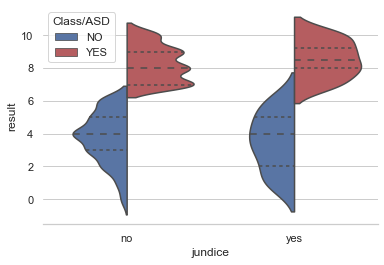

In [15]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

<AxesSubplot: xlabel='jundice', ylabel='result'>

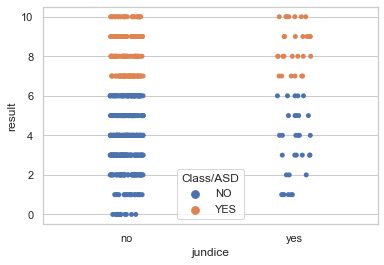

In [16]:
sns.stripplot(x="jundice", y="result", hue="Class/ASD", data=asd_data)

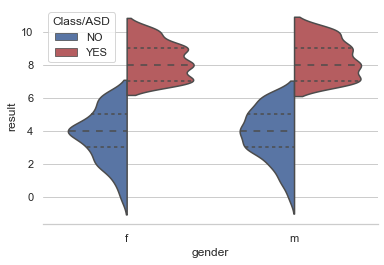

In [17]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

<AxesSubplot: xlabel='gender', ylabel='result'>

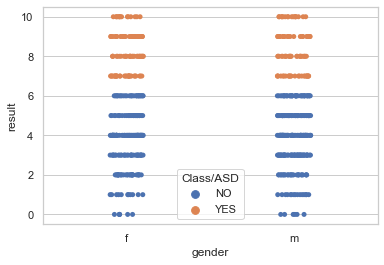

In [18]:
sns.stripplot(x="gender", y="result", hue="Class/ASD", data=asd_data)

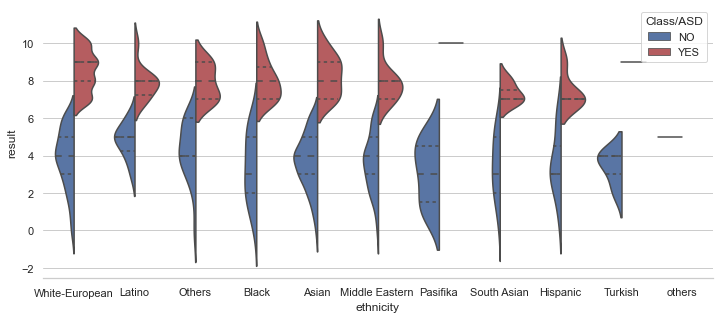

In [19]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.violinplot(x="ethnicity", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"},ax=ax)
sns.despine(left=True)

<AxesSubplot: xlabel='ethnicity', ylabel='result'>

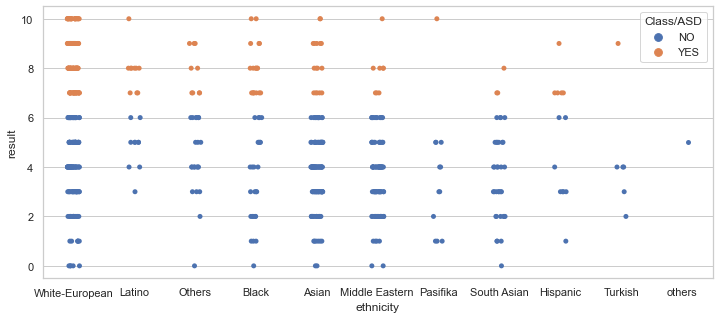

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.stripplot(x="ethnicity", y="result", hue="Class/ASD", data=asd_data, ax=ax)

Data Preprocessing and Feature Selection

In [21]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Display dataframe after scaling the values
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,United States,0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,United States,0.6,Self,1,1,0,1,0,0,1,1,0,1
5,0.051913,m,Others,yes,no,United States,0.9,Self,1,1,1,1,1,0,1,1,1,1


One-Hot Encoding

In [23]:
#One-hot encode the 'features_minmax_transform' data 
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the total number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))



,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,...,contry_of_res_United Arab Emirates,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,0.6,1,1,1,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
1,0.019126,0.5,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.027322,0.8,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0.049180,0.6,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
5,0.051913,0.9,1,1,1,1,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1


94 total features after one-hot encoding.


Split the data into training and test sets(80% for training and 20% for testing)

In [24]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, Y_train, Y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 487 samples.
Testing set has 122 samples.


Supervised Learning Models for ASD Classification  

Decision Trees

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1)

In [26]:
Y_pred_class = dectree.predict(X_test)

In [27]:
from sklearn import metrics

In [28]:
# Evaluation metrics
print(metrics.accuracy_score(Y_test, Y_pred_class))
print(metrics.precision_score(Y_test, Y_pred_class))
print(metrics.average_precision_score(Y_test, Y_pred_class))
print(metrics.recall_score(Y_test, Y_pred_class))
print(metrics.f1_score(Y_test, Y_pred_class))
print(metrics.roc_auc_score(Y_test, Y_pred_class))

1.0
1.0
1.0
1.0
1.0
1.0


Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9933333333333334

In [30]:
# calculate cross-validated AUC
cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9988095238095237

In [31]:
ranfor.fit(X_train, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

1.0

Support Vector Machine (SVM)

In [32]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [33]:
cv_scores = cross_val_score(svc, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

In [34]:
# calculate cross-validated AUC
cross_val_score(svc, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

In [35]:
svc.fit(X_train, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

1.0

K-Nearest-Neighbors (KNN)

In [36]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)

cv_scores.mean()

0.9474590163934427

In [37]:
# calculate cross-validated AUC
cross_val_score(knn, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9930740125507567

In [38]:
knn.fit(X_train, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

0.9360730593607306

In [39]:
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)
    print (n, cv_scores.mean())

10 0.9474590163934427
11 0.9507377049180328
12 0.9507377049180328
13 0.9556830601092896
14 0.9507650273224044
15 0.944207650273224
16 0.9507650273224044
17 0.9507377049180328
18 0.9523770491803278
19 0.9540163934426229
20 0.9523770491803278
21 0.9523770491803278
22 0.9474590163934424
23 0.9490983606557375
24 0.9507377049180326
25 0.9507377049180328
26 0.9523770491803278
27 0.9507377049180328
28 0.9507377049180326
29 0.9507377049180328
30 0.9523770491803278
31 0.9474863387978143
32 0.9491256830601094
33 0.9474863387978143
34 0.9507650273224044
35 0.9491256830601094
36 0.9491256830601091
37 0.9507650273224044
38 0.9540710382513661
39 0.9524316939890708
40 0.9540710382513659
41 0.9524316939890708
42 0.9524316939890708
43 0.9507923497267757
44 0.9507923497267757
45 0.9507923497267757
46 0.9524316939890708
47 0.9524316939890708
48 0.9540710382513661
49 0.9524316939890708


Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_classes, cv=10)

cv_scores.mean()


0.885

In [41]:
# calculate cross-validated AUC
cross_val_score(nb, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9445090439276485

In [42]:
nb.fit(X_train, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

0.8370044052863436

Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9934426229508198

In [44]:
# calculate cross-validated AUC
cv_scores_roc = cross_val_score(logreg, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

1.0

In [45]:
logreg.fit(X_train, Y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(Y_test, predictions_test, average='binary', beta=0.5)

0.9641255605381165

Neural Network using Keras

This Neural Network is feed forward and a linear binary classifier, otherwise known as Multi Layer Perceptron

In [46]:
# Import the necessary libraries
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
np.random.seed(42)

In [47]:
# Building the model architecture with one layer of length 4
model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 94))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 760       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compiling the model using categorical_crossentropy loss and rmsprop optimizer with accuracy as a metric
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [49]:
# Running and evaluating the model
final_model = model.fit(X_train, Y_train, batch_size=16, epochs=100, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/100
31/31 - 1s - loss: 0.6791 - accuracy: 0.6858 - val_loss: 0.6753 - val_accuracy: 0.6475 - 937ms/epoch - 30ms/step
Epoch 2/100
31/31 - 0s - loss: 0.6554 - accuracy: 0.7187 - val_loss: 0.6563 - val_accuracy: 0.6475 - 49ms/epoch - 2ms/step
Epoch 3/100
31/31 - 0s - loss: 0.6289 - accuracy: 0.7269 - val_loss: 0.6312 - val_accuracy: 0.6475 - 43ms/epoch - 1ms/step
Epoch 4/100
31/31 - 0s - loss: 0.6016 - accuracy: 0.7207 - val_loss: 0.6050 - val_accuracy: 0.6557 - 47ms/epoch - 2ms/step
Epoch 5/100
31/31 - 0s - loss: 0.5652 - accuracy: 0.7331 - val_loss: 0.5739 - val_accuracy: 0.6557 - 49ms/epoch - 2ms/step
Epoch 6/100
31/31 - 0s - loss: 0.5319 - accuracy: 0.7618 - val_loss: 0.5408 - val_accuracy: 0.6885 - 47ms/epoch - 2ms/step
Epoch 7/100
31/31 - 0s - loss: 0.5016 - accuracy: 0.7782 - val_loss: 0.5048 - val_accuracy: 0.7295 - 45ms/epoch - 1ms/step
Epoch 8/100
31/31 - 0s - loss: 0.4622 - accuracy: 0.8131 - val_loss: 0.4683 - val_accuracy: 0.7623 - 50ms/epoch - 2ms/step
Epoch 9/100
31

Epoch 68/100
31/31 - 0s - loss: 0.0712 - accuracy: 0.9713 - val_loss: 0.0760 - val_accuracy: 0.9754 - 43ms/epoch - 1ms/step
Epoch 69/100
31/31 - 0s - loss: 0.0758 - accuracy: 0.9774 - val_loss: 0.0754 - val_accuracy: 0.9754 - 39ms/epoch - 1ms/step
Epoch 70/100
31/31 - 0s - loss: 0.0841 - accuracy: 0.9610 - val_loss: 0.0740 - val_accuracy: 0.9754 - 40ms/epoch - 1ms/step
Epoch 71/100
31/31 - 0s - loss: 0.0769 - accuracy: 0.9589 - val_loss: 0.0745 - val_accuracy: 0.9754 - 51ms/epoch - 2ms/step
Epoch 72/100
31/31 - 0s - loss: 0.0681 - accuracy: 0.9754 - val_loss: 0.0724 - val_accuracy: 0.9754 - 40ms/epoch - 1ms/step
Epoch 73/100
31/31 - 0s - loss: 0.0716 - accuracy: 0.9651 - val_loss: 0.0716 - val_accuracy: 0.9754 - 40ms/epoch - 1ms/step
Epoch 74/100
31/31 - 0s - loss: 0.0702 - accuracy: 0.9774 - val_loss: 0.0713 - val_accuracy: 0.9754 - 41ms/epoch - 1ms/step
Epoch 75/100
31/31 - 0s - loss: 0.0682 - accuracy: 0.9713 - val_loss: 0.0695 - val_accuracy: 0.9754 - 41ms/epoch - 1ms/step
Epoch 76

In [51]:
# Evaluating the model on the training and testing set with accuracy as a metric
score = model.evaluate(X_train, Y_train)
print("\n Training Accuracy:", score[1])

score = model.evaluate(X_test, Y_test, verbose=0)
print("\n Testing accuracy: ", score[1])

16/16 [==============================] - 0s 798us/step - loss: 0.0253 - accuracy: 0.9979

 Training Accuracy: 0.9979466199874878

 Testing accuracy:  0.9754098653793335


Conclusion: All the supervised learning models and Multi Layer Perceptron exhibit high performance and the classification is highly dependent on the 'result' variable which is the score a person receives from the AQ-10 test. These models can be used for detecting Autism in adults alongside professional advice. To build more accurate models, a larger dataset is recommended. 